# Imports

In [66]:
import iris
import matplotlib as mpl
import numpy as np
from iris.plot import pcolormesh
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
from iris.coord_systems import GeogCS
import cartopy.crs as ccrs
import cf_units
import cftime
import iris.coord_categorisation
import matplotlib
import matplotlib.pyplot as plt
import iris.quickplot as qplt
from scipy import stats
import numpy.ma as ma
import matplotlib.colors as mcols
import statsmodels.api as sm
from scipy.stats import norm, uniform
import cartopy.feature as cfeature
from collections import OrderedDict 
import xarray as xr
import ascend
import cartopy.io.shapereader as shpreader
from ascend import shape
import glob
import pickle
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram

# Read in dataframes

In [90]:
#obs = pd.read_pickle(f'/scratch/cburton/scratch/ISIMIP3a/Data/observation_df.pkl')#3 obs, GFED4.1s, CCI5.1, CCILT11
obs = pd.read_pickle(f'/scratch/cburton/scratch/ISIMIP3a/Data/AR6_obs_df.pkl')#2 obs, CCI5.1 & MCD64

obsclim = pd.read_pickle(f'/scratch/cburton/scratch/ISIMIP3a/Data/AR6_obsclim_df.pkl')
counterclim = pd.read_pickle(f'/scratch/cburton/scratch/ISIMIP3a/Data/AR6_counterclim_df.pkl')

#weights = pd.read_pickle(f'/scratch/cburton/scratch/ISIMIP3a/Data/NME3_Weights.pkl')
weights = pd.read_pickle(f'/scratch/cburton/scratch/ISIMIP3a/Data/NME3_Weights.pkl')



Model    CLASSIC     JULES  LPJ-GUESS-SIMFIRE-BLAZE  LPJ-GUESS-SPITFIRE  \
weights  0.20755  0.166042                 0.160071            0.099039   

Model    ORCHIDEE-MICT-SPITFIRE     SSiB4    VISIT  
weights                0.043684  0.257704  0.06591  


# Make Anomalies and Relative Anomalies

In [68]:
### ANNUAL
#Create new dataframes - ANNUAL, GLOBAL, 2003-2019
obs_global = obs.groupby(by='Observation', axis=1).sum(min_count=1) 
obs_select2_glob = obs_global[['FireCCI5.1', 'GFED5']]
obs_annual_glob = obs_select2_glob.groupby(obs_select2_glob.index.to_period('Y')).sum(min_count=1)
obs_0319_annual_glob = obs_annual_glob.iloc[20:37]#2003-2019

obsclim_global = obsclim.groupby(by='Model', axis=1).sum(min_count=1) 
obsclim_annual_glob = obsclim_global.groupby(obsclim_global.index.to_period('Y')).sum(min_count=1)
obsclim_0319_annual_glob = obsclim_annual_glob.iloc[102:119]#2003-2019

#Create new dataframes - ANNUAL, GLOBAL, 1982-2019
obs_global = obs.groupby(by='Observation', axis=1).sum(min_count=1) 
obs_annual_glob = obs_global.groupby(obs_global.index.to_period('Y')).sum(min_count=1)
obs_annual_glob_Ranom = (obs_annual_glob - obs_annual_glob.mean()) / obs_annual_glob.mean()

obsclim_global = obsclim.groupby(by='Model', axis=1).sum(min_count=1) 
obsclim_annual_glob = obsclim_global.groupby(obsclim_global.index.to_period('Y')).sum(min_count=1)
obsclim_8219_annual_glob = obsclim_annual_glob.iloc[81:119]#1982-2019
obsclim_8219_annual_glob_Ranom = (obsclim_8219_annual_glob - obsclim_8219_annual_glob.mean()) / obsclim_8219_annual_glob.mean()


#Create new dataframes of anomalies - ANNUAL, GLOBAL, 2002-2019
obs_0319_annual_glob_anom = obs_0319_annual_glob - obs_0319_annual_glob.mean()
obsclim_0319_annual_glob_anom = obsclim_0319_annual_glob - obsclim_0319_annual_glob.mean()

#Create new dataframes of RELATIVE anomalies - ANNUAL, GLOBAL, 2002-2019
obs_0319_annual_glob_Ranom = (obs_0319_annual_glob - obs_0319_annual_glob.mean()) / obs_0319_annual_glob.mean()
obsclim_0319_annual_glob_Ranom = (obsclim_0319_annual_glob - obsclim_0319_annual_glob.mean())/obsclim_0319_annual_glob.mean()

#Create new dataframes of RELATIVE anomalies - ANNUAL, GLOBAL, 1901-2019
obs_annual_glob_Ranom = (obs_annual_glob - obs_annual_glob.mean()) / obs_annual_glob.mean()
obsclim_annual_glob_Ranom = (obsclim_annual_glob - obsclim_annual_glob.mean())/obsclim_annual_glob.mean()


#Create new dataframes of RELATIVE anomalies - ANNUAL, REGIONAL, 2003-2019
obs_annual_Reg = obs.groupby(obs.index.to_period('Y')).sum(min_count=1)
obs_0319_annual_Reg = obs_annual_Reg.iloc[20:37]#2003-2019
obs_0319_annual_Reg_Ranom = (obs_0319_annual_Reg - obs_0319_annual_Reg.mean()) / obs_0319_annual_Reg.mean()

obsclim_annual_Reg = obsclim.groupby(obsclim.index.to_period('Y')).sum(min_count=1)
obsclim_0319_annual_Reg = obsclim_annual_Reg.iloc[20:37]#2003-2019
obsclim_0319_annual_Reg_Ranom = (obsclim_0319_annual_Reg - obsclim_0319_annual_Reg.mean()) / obsclim_0319_annual_Reg.mean()


### MONTHLY
#Create new dataframes of anom, Ranom, z-score - MONTHLY, GLOBAL
obs_0319_glob = obs_global.iloc[240:444]#2003-2019
obs_0319_anom_glob = obs_0319_glob - obs_0319_glob.mean()
obs_0319_Ranom_glob = (obs_0319_glob - obs_0319_glob.mean()) / obs_0319_glob.mean()
obs_zscore_glob = (obs_0319_glob - obs_0319_glob.mean()) / obs_0319_glob.std()

obsclim_0319_glob = obsclim_global.iloc[1224:1428]#2003-2019
obsclim_0319_anom_glob = obsclim_0319_glob - obsclim_0319_glob.mean()
obsclim_0319_Ranom_glob = (obsclim_0319_glob - obsclim_0319_glob.mean()) / obsclim_0319_glob.mean()
obsclim_0319_zscore_glob = (obsclim_0319_glob - obsclim_0319_glob.mean()) / obsclim_0319_glob.std()


#monthly output by region
obs_0319 = obs.iloc[240:444]#2003-2019
obsclim_0319 = obsclim.iloc[1224:1428]#2003-2019

#obsclim_0319_Danom = obsclim_0319.mean() / obs_0319.mean()
#obs_0319_Danom = obs_0319.mean() / obs_0319.mean()


#RELATIVE ANOMALY monthly by region
obs_0319_Ranom = (obs_0319 - obs_0319.mean())/obs_0319.mean()
obsclim_0319_Ranom = (obsclim_0319 - obsclim_0319.mean())/obsclim_0319.mean()


#Global, monthly, drop VISIT
obsclim_0319_glob_noVISIT = obsclim_0319_glob.drop(['VISIT'], axis=1) 

counterclim_0319 = counterclim.iloc[1212:1428]#2003-2019
counterclim_0319_glob = counterclim_0319.groupby(by='Model', axis=1).sum(min_count=1) 
counterclim_0319_glob_noVISIT = counterclim_0319_glob.drop(['VISIT'], axis=1) 



#Plot burnt area Pre-Industrial monthly GLOBAL
obsclim_0319_Ranom_glob_noVISIT = (obsclim_0319_glob_noVISIT - obsclim_0319_glob_noVISIT.mean())/obsclim_0319_glob_noVISIT.mean()   
counterclim_0319_Ranom_glob_noVISIT = (counterclim_0319_glob_noVISIT - counterclim_0319_glob_noVISIT.mean())/counterclim_0319_glob_noVISIT.mean()

obsclim_PI = obsclim.iloc[0:228]#1901-1920
counterclim_PI = counterclim.iloc[0:228]#1901-1920

obsclim_global_PI = obsclim_PI.groupby(by='Model', axis=1).sum(min_count=1)
obsclim_global_PI_noVISIT = obsclim_global_PI.drop(['VISIT'], axis=1) 

counterclim_global_PI = counterclim_PI.groupby(by='Model', axis=1).sum(min_count=1) 
counterclim_global_PI_noVISIT = counterclim_global_PI.drop(['VISIT'], axis=1) 

obsclim_PI_Ranom_glob_noVISIT = (obsclim_global_PI_noVISIT - obsclim_global_PI_noVISIT.mean()) / obsclim_global_PI_noVISIT.mean()
counterclim_PI_Ranom_glob_noVISIT = (counterclim_global_PI_noVISIT - counterclim_global_PI_noVISIT.mean()) / counterclim_global_PI_noVISIT.mean()

#Plot burnt area monthly GLOBAL 1901-2019
obsclim_global_long = obsclim.groupby(by='Model', axis=1).sum(min_count=1)
obsclim_global_long_noVISIT = obsclim_global_long.drop(['VISIT'], axis=1) 

counterclim_global_long = counterclim.groupby(by='Model', axis=1).sum(min_count=1) 
counterclim_global_long_noVISIT = counterclim_global_long.drop(['VISIT'], axis=1) 


#Plot burnt area  monthly GLOBAL 1950-2019
obsclim_1950 = obsclim.iloc[828:1428]#1950-2019
counterclim_1950 = counterclim.iloc[828:1428]#1950-2019

obsclim_global_1950 = obsclim_1950.groupby(by='Model', axis=1).sum(min_count=1)
obsclim_global_1950_noVISIT = obsclim_global_1950.drop(['VISIT'], axis=1) 

counterclim_global_1950 = counterclim_1950.groupby(by='Model', axis=1).sum(min_count=1) 
counterclim_global_1950_noVISIT = counterclim_global_1950.drop(['VISIT'], axis=1) 

obsclim_1950_Ranom_glob_noVISIT = (obsclim_global_1950_noVISIT - obsclim_global_1950_noVISIT.mean()) / obsclim_global_1950_noVISIT.mean()
counterclim_1950_Ranom_glob_noVISIT = (counterclim_global_1950_noVISIT - counterclim_global_1950_noVISIT.mean()) / counterclim_global_1950_noVISIT.mean()



# Time series

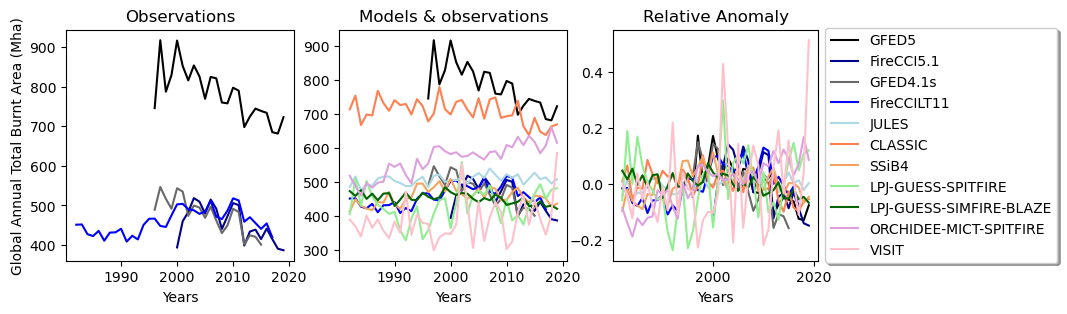

In [69]:
obscolors= ('white','black', 'darkblue', 'dimgrey','blue') 
AllObs = ['GFED5','FireCCI5.1','GFED4.1s', 'FireCCILT11', ]


fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,3,1)
x1 = np.arange(1982,2020)
n=1
for Data in AllObs:
    ax.plot(x1,obs_annual_glob[Data], color = obscolors[n % len(obscolors)], label=Data)
    n = n+1
plt.xlabel('Years')
plt.ylabel('Global Annual Total Burnt Area (Mha)')
plt.title('Observations')


ax2 = fig.add_subplot(1,3,2)
x = np.arange(1901,2020)
n=1
for Data in AllObs:
    ax2.plot(x1,obs_annual_glob[Data], color = obscolors[n % len(obscolors)], label=Data)
    n = n+1
modelcolors= ('white','lightblue', 'coral', 'sandybrown', 'lightgreen','darkgreen', 'plum', 'pink') 
AllModels = ['JULES', 'CLASSIC', 'SSiB4', 'LPJ-GUESS-SPITFIRE','LPJ-GUESS-SIMFIRE-BLAZE', 'ORCHIDEE-MICT-SPITFIRE', 'VISIT']
n=1
for Data in AllModels:
    ax2.plot(x1,obsclim_8219_annual_glob[Data], color = modelcolors[n % len(modelcolors)], label=Data)
    n = n+1
plt.xlabel('Years')
plt.title('Models & observations')


ax3 = fig.add_subplot(1,3,3)
n=1
for Data in AllObs:
    ax3.plot(x1,obs_annual_glob_Ranom[Data], color = obscolors[n % len(obscolors)], label=Data)
    n = n+1
n=1
for Data in AllModels:
    ax3.plot(x1,obsclim_8219_annual_glob_Ranom[Data], color = modelcolors[n % len(modelcolors)], label=Data)
    n = n+1
box = ax3.get_position()
ax3.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax3.legend(bbox_to_anchor=(1.0, 0.5), loc="center left",
          fancybox=True, shadow=True, ncol=1)
plt.xlabel('Years')
plt.title('Relative Anomaly')
plt.show()

# Validation PDF (Monthly, Regions, Relative Anomaly)

/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True, label=obs_name, ax=ax, kde_kws={'linewidth': 3,'color':obs_colours[obs_name]})
/var/tmp/ipykernel_111120/1651987132.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True, label=obs_name, ax=ax, kde_kws={'linewidth': 3,'color':obs_colours[obs_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True, label=obs_name, ax=ax, kde_kws={'linewidth': 3,'color':obs_colours[obs_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True, label=obs_name, ax=ax, kde_kws={'linewidth': 3,'color':obs_colours[obs_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True, label=obs_name, ax=ax, kde_kws={'linewidth': 3,'color':obs_colours[obs_name]})
/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

/var/tmp/ipykernel_111120/1651987132.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/1651987132.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/tmp/ipykernel_111120/1651987132.py:42: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(obs_0319_Ranom_glob[Data], hist=False, kde=True, ax=ax,
/var/tmp/ipykernel_111120/1651987132.py:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(obsclim_0319_Ranom_glob[Data], hist=False,

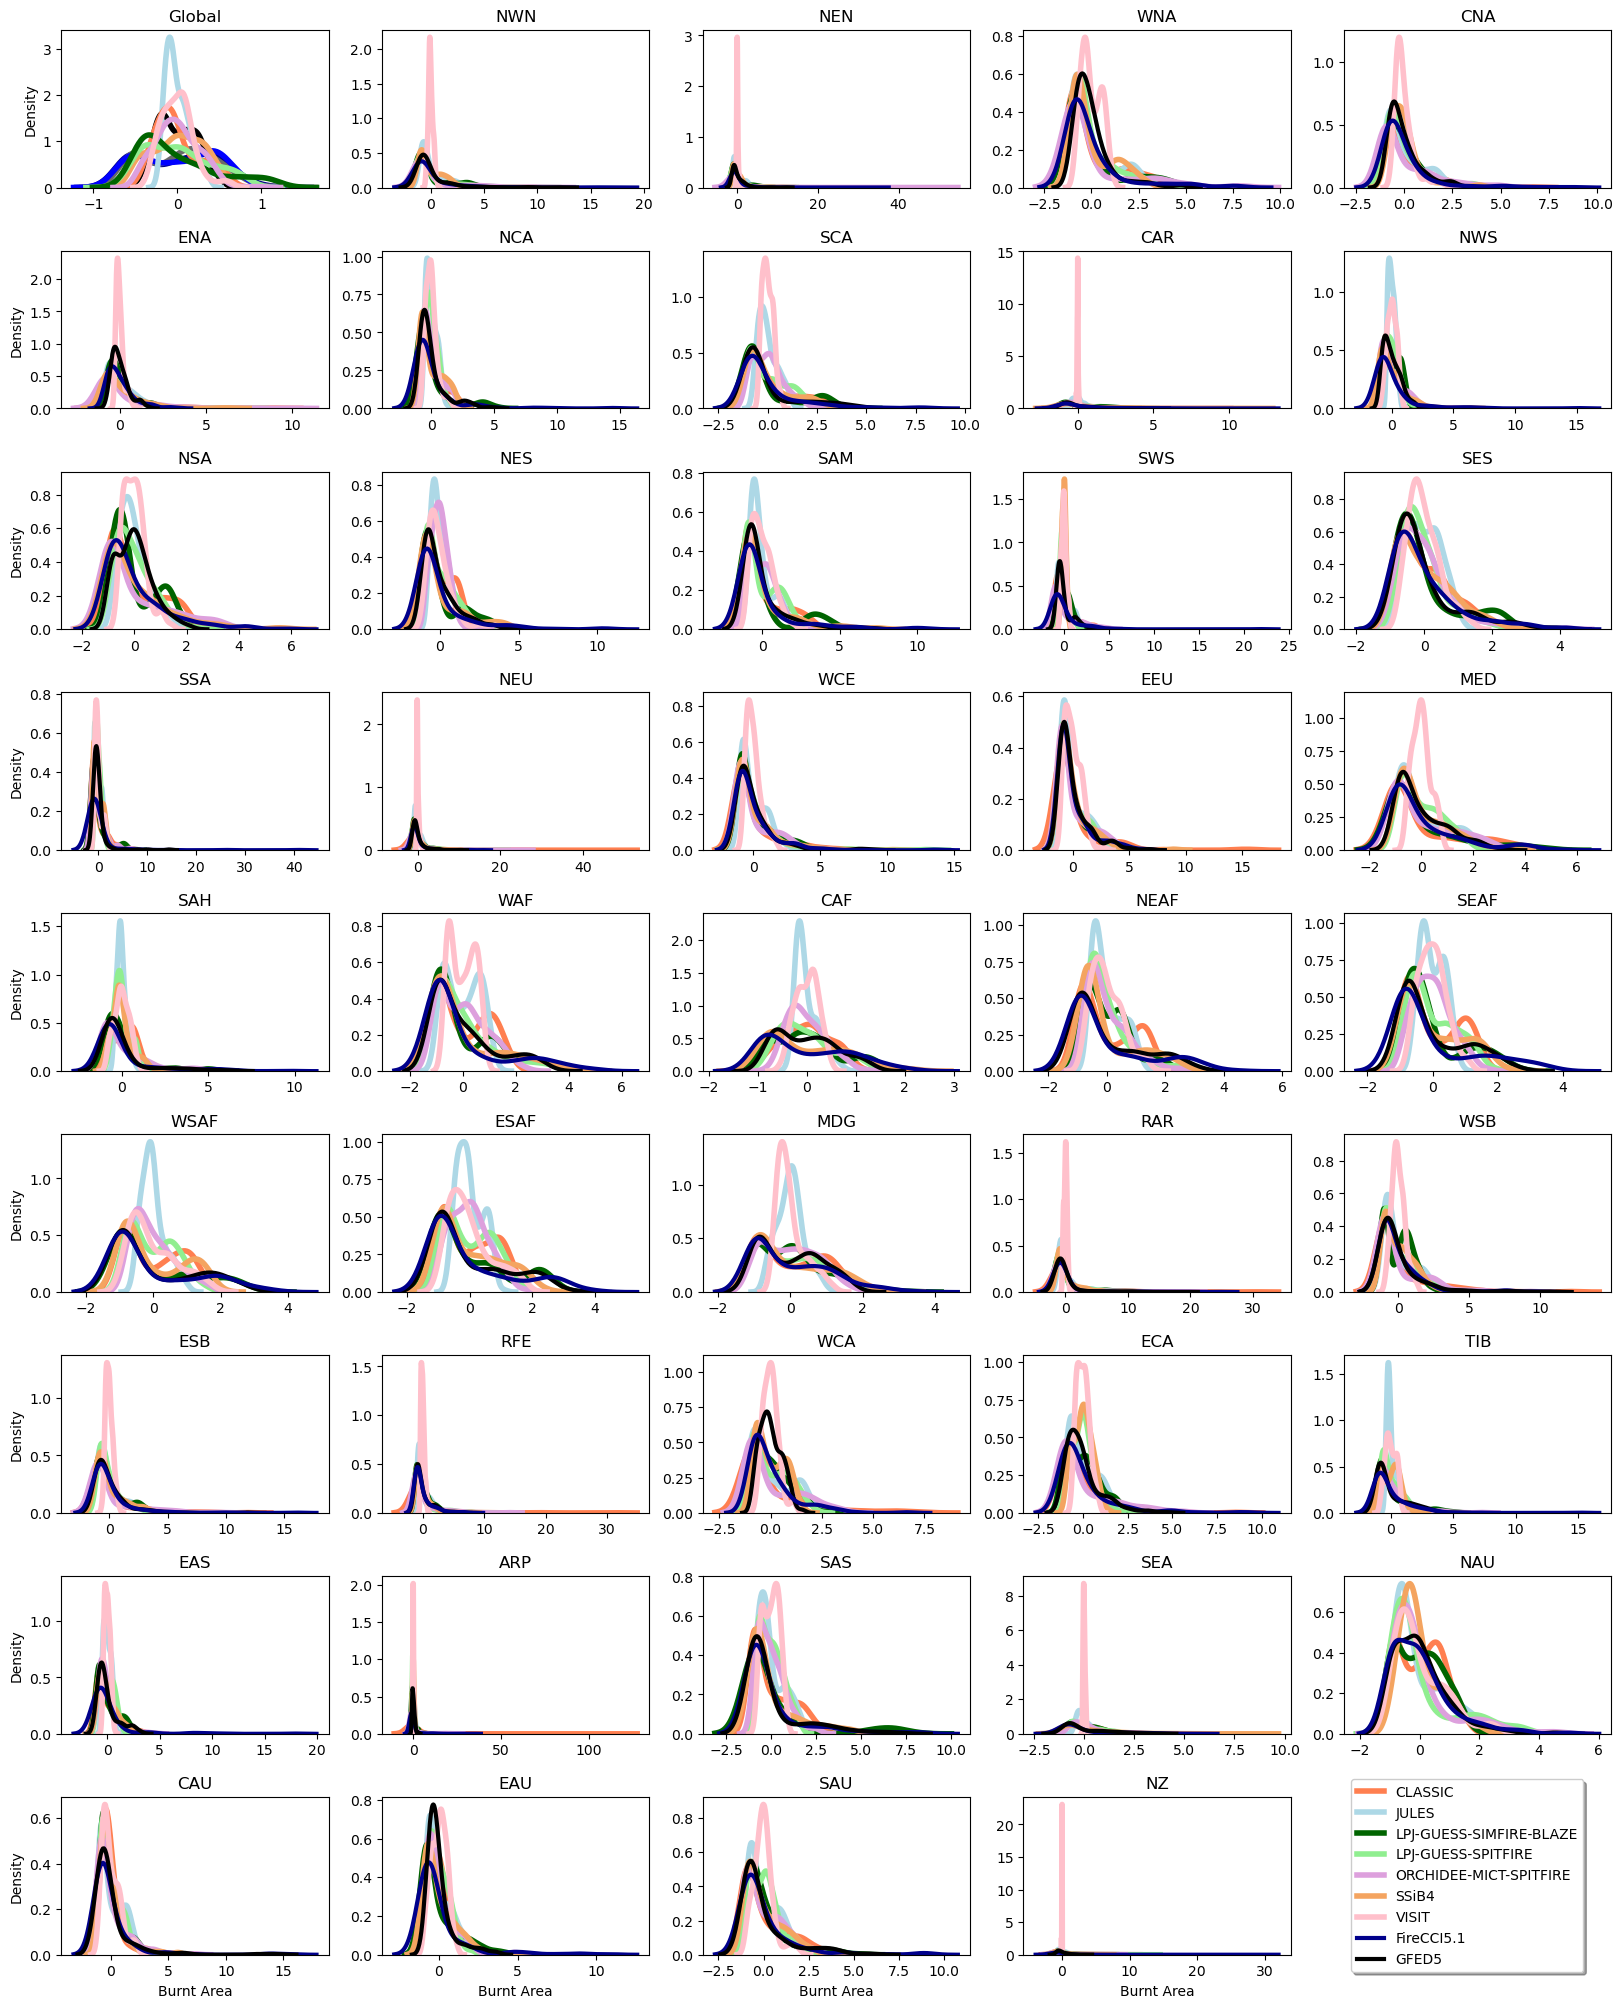

In [8]:
obs_colours= {'GFED5':'black', 'FireCCI5.1':'darkblue'} 

model_colours = {'JULES': 'lightblue', 
              'CLASSIC': 'coral', 
              'SSiB4': 'sandybrown',
              'LPJ-GUESS-SPITFIRE': 'lightgreen',
            'LPJ-GUESS-SIMFIRE-BLAZE': 'darkgreen',
            'ORCHIDEE-MICT-SPITFIRE':'plum',
             'VISIT':'pink'}

fig, axs = plt.subplots(9, 5, figsize=(20, 25))
axs = axs.ravel()

#Do all the regions
for idx, regionname in enumerate(obsclim_0319_Ranom.columns.unique(level='Region')):
    ax = axs[idx+1]
    for model_name in obsclim_0319_Ranom[regionname].columns: 
        #if model_name != 'VISIT':    
            data = obsclim_0319_Ranom[regionname][model_name]
            sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})                
    for obs_name in obs_0319_Ranom[regionname].columns:
        if obs_name == 'GFED5' or obs_name == 'FireCCI5.1':
            data = obs_0319_Ranom[regionname][obs_name]
            sns.distplot(data, hist=False, kde=True, label=obs_name, ax=ax, kde_kws={'linewidth': 3,'color':obs_colours[obs_name]})
    ax.set_title(regionname)
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')


plt.delaxes(axs[-1])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.2, 0.5), loc="center left",
          fancybox=True, shadow=True, ncol=1)


#Now do the global plot
#AllModels = ['JULES', 'CLASSIC', 'SSiB4', 'LPJ-GUESS-SPITFIRE','LPJ-GUESS-SIMFIRE-BLAZE', 'ORCHIDEE-MICT-SPITFIRE']
ax = axs[0]
n=1
for Data in AllObs:
    sns.distplot(obs_0319_Ranom_glob[Data], hist=False, kde=True, ax=ax,
                 color = obscolors[n % len(obscolors)], 
                 hist_kws={'edgecolor':obscolors[n % len(obscolors)]},
                 kde_kws={'linewidth': 4, 'color': obscolors[n % len(obscolors)], 'label':Data})
    n = n+1    
n=1
for Data in AllModels:  
    sns.distplot(obsclim_0319_Ranom_glob[Data], hist=False, kde=True, ax=ax,
                 color = modelcolors[n % len(modelcolors)], 
                 hist_kws={'edgecolor':modelcolors[n % len(modelcolors)]},
                 kde_kws={'linewidth': 4, 'color': modelcolors[n % len(modelcolors)], 'label':Data})
    n = n+1         
ax.set_xlabel(' ')
ax.set_ylabel(' ') 
ax.set_title('Global')

#Set the axis labels
for ax in axs[40:44]:
    ax.set_xlabel('Burnt Area')
PlotsNos = [0,5,10,15,20,25,30,35,40]   
for ax in axs[PlotsNos]:
    ax.set_ylabel('Density')
plt.subplots_adjust(hspace=0.4)
plt.savefig('/scratch/cburton/scratch/ISIMIP3a/Draft2.0/AR6regions_Ranom_wVISIT.png',facecolor='w', transparent=False)    
plt.show()


# QQ plots all regions

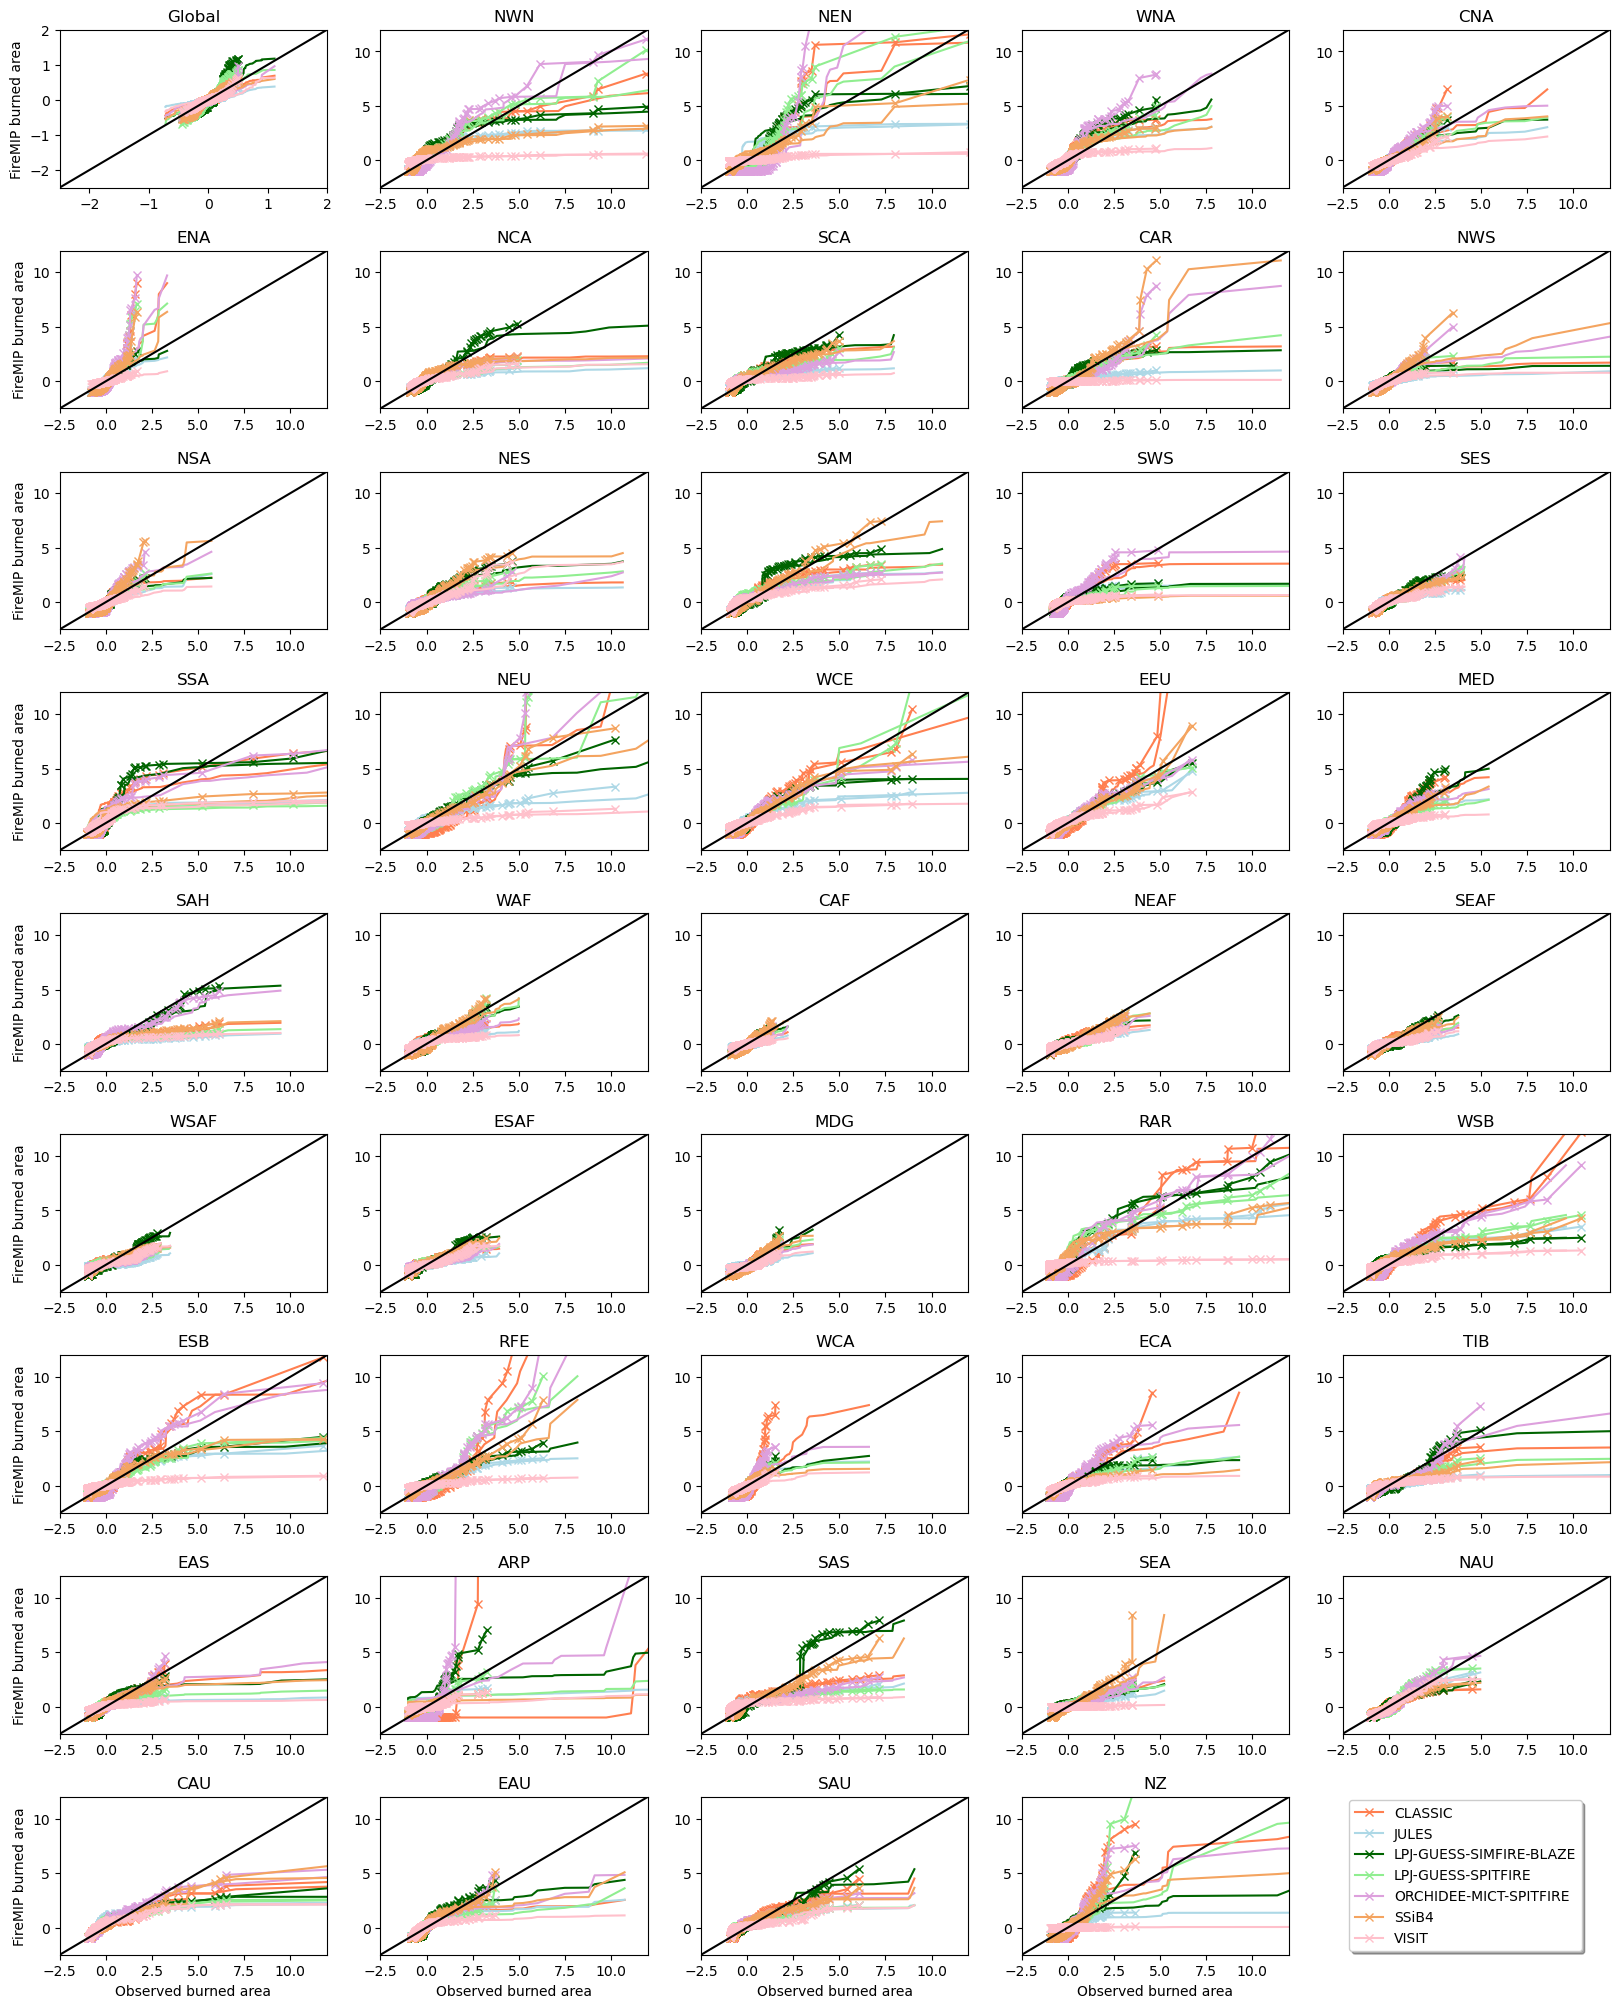

In [85]:


model_colours = {'JULES': 'lightblue', 
              'CLASSIC': 'coral', 
              'SSiB4': 'sandybrown',
              'LPJ-GUESS-SPITFIRE': 'lightgreen',
            'LPJ-GUESS-SIMFIRE-BLAZE': 'darkgreen',
            'ORCHIDEE-MICT-SPITFIRE':'plum',
             'VISIT':'pink'}


fig, axs = plt.subplots(9, 5, figsize=(20, 25))
axs = axs.ravel()

#Plot all regions
for idx, regionname in enumerate(obsclim_0319_Ranom.columns.unique(level='Region')):
    ax = axs[idx+1]
    for model_name in obsclim_0319_Ranom[regionname].columns:
        ax.plot(np.sort(obs_0319_Ranom[regionname]['GFED5']), np.sort(obsclim_0319_Ranom[regionname][model_name]), marker='x', color=model_colours[model_name], label=model_name)
        ax.plot(np.sort(obs_0319_Ranom[regionname]['FireCCI5.1']), np.sort(obsclim_0319_Ranom[regionname][model_name]), color=model_colours[model_name])

    axis_min=-2.5
    axix_max=12.0
    ax.set_xlabel('  ')
    ax.set_ylabel(' ')
    ax.plot([axis_min,axix_max],[axis_min,axix_max],color="k")
    ax.set_ylim(axis_min,axix_max)
    ax.set_xlim(axis_min,axix_max)    
    ax.set_title(regionname)

    
plt.delaxes(axs[-1])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.2, 0.5), loc="center left",
          fancybox=True, shadow=True, ncol=1)

#Now do the global plot
ax = axs[0]
for model_name in obsclim_0319_Ranom_glob.columns:
    ax.plot(np.sort(obs_0319_Ranom_glob['GFED5']), np.sort(obsclim_0319_Ranom_glob[model_name]), marker='x', color=model_colours[model_name], label=model_name)
    ax.plot(np.sort(obs_0319_Ranom_glob['FireCCI5.1']), np.sort(obsclim_0319_Ranom_glob[model_name]), color=model_colours[model_name])
         
axis_min=-2.5
axis_max=2.0
ax.set_xlabel('  ')
ax.set_ylabel(' ')
ax.plot([axis_min,axis_max],[axis_min,axis_max],color="k")
ax.set_ylim(axis_min,axis_max)
ax.set_xlim(axis_min,axis_max)    
ax.set_title('Global')

#Set the axis labels
for ax in axs[40:44]:
    ax.set_xlabel('Observed burned area')
PlotsNos = [0,5,10,15,20,25,30,35,40]   
for ax in axs[PlotsNos]:
    ax.set_ylabel('FireMIP burned area')    

plt.subplots_adjust(hspace=0.4)  
plt.savefig('/scratch/cburton/scratch/ISIMIP3a/Draft2.0/QQ_R6regions_Ranom.png',facecolor='w', transparent=False)
plt.show()



# Power spectra Relative, mothly, regions, realtive anomaly 

/var/tmp/ipykernel_125776/1307494216.py:12: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1./f, sp, color=model_colours[model_name], label=model_name)
/var/tmp/ipykernel_125776/1307494216.py:16: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1./f, sp, color=obs_colours[obs_name], label=obs_name)
/var/tmp/ipykernel_125776/1307494216.py:32: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1./f, sp, color=model_colours[model_name], label=model_name)
/var/tmp/ipykernel_125776/1307494216.py:36: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1./f, sp, color=obs_colours[obs_name], label=obs_name)


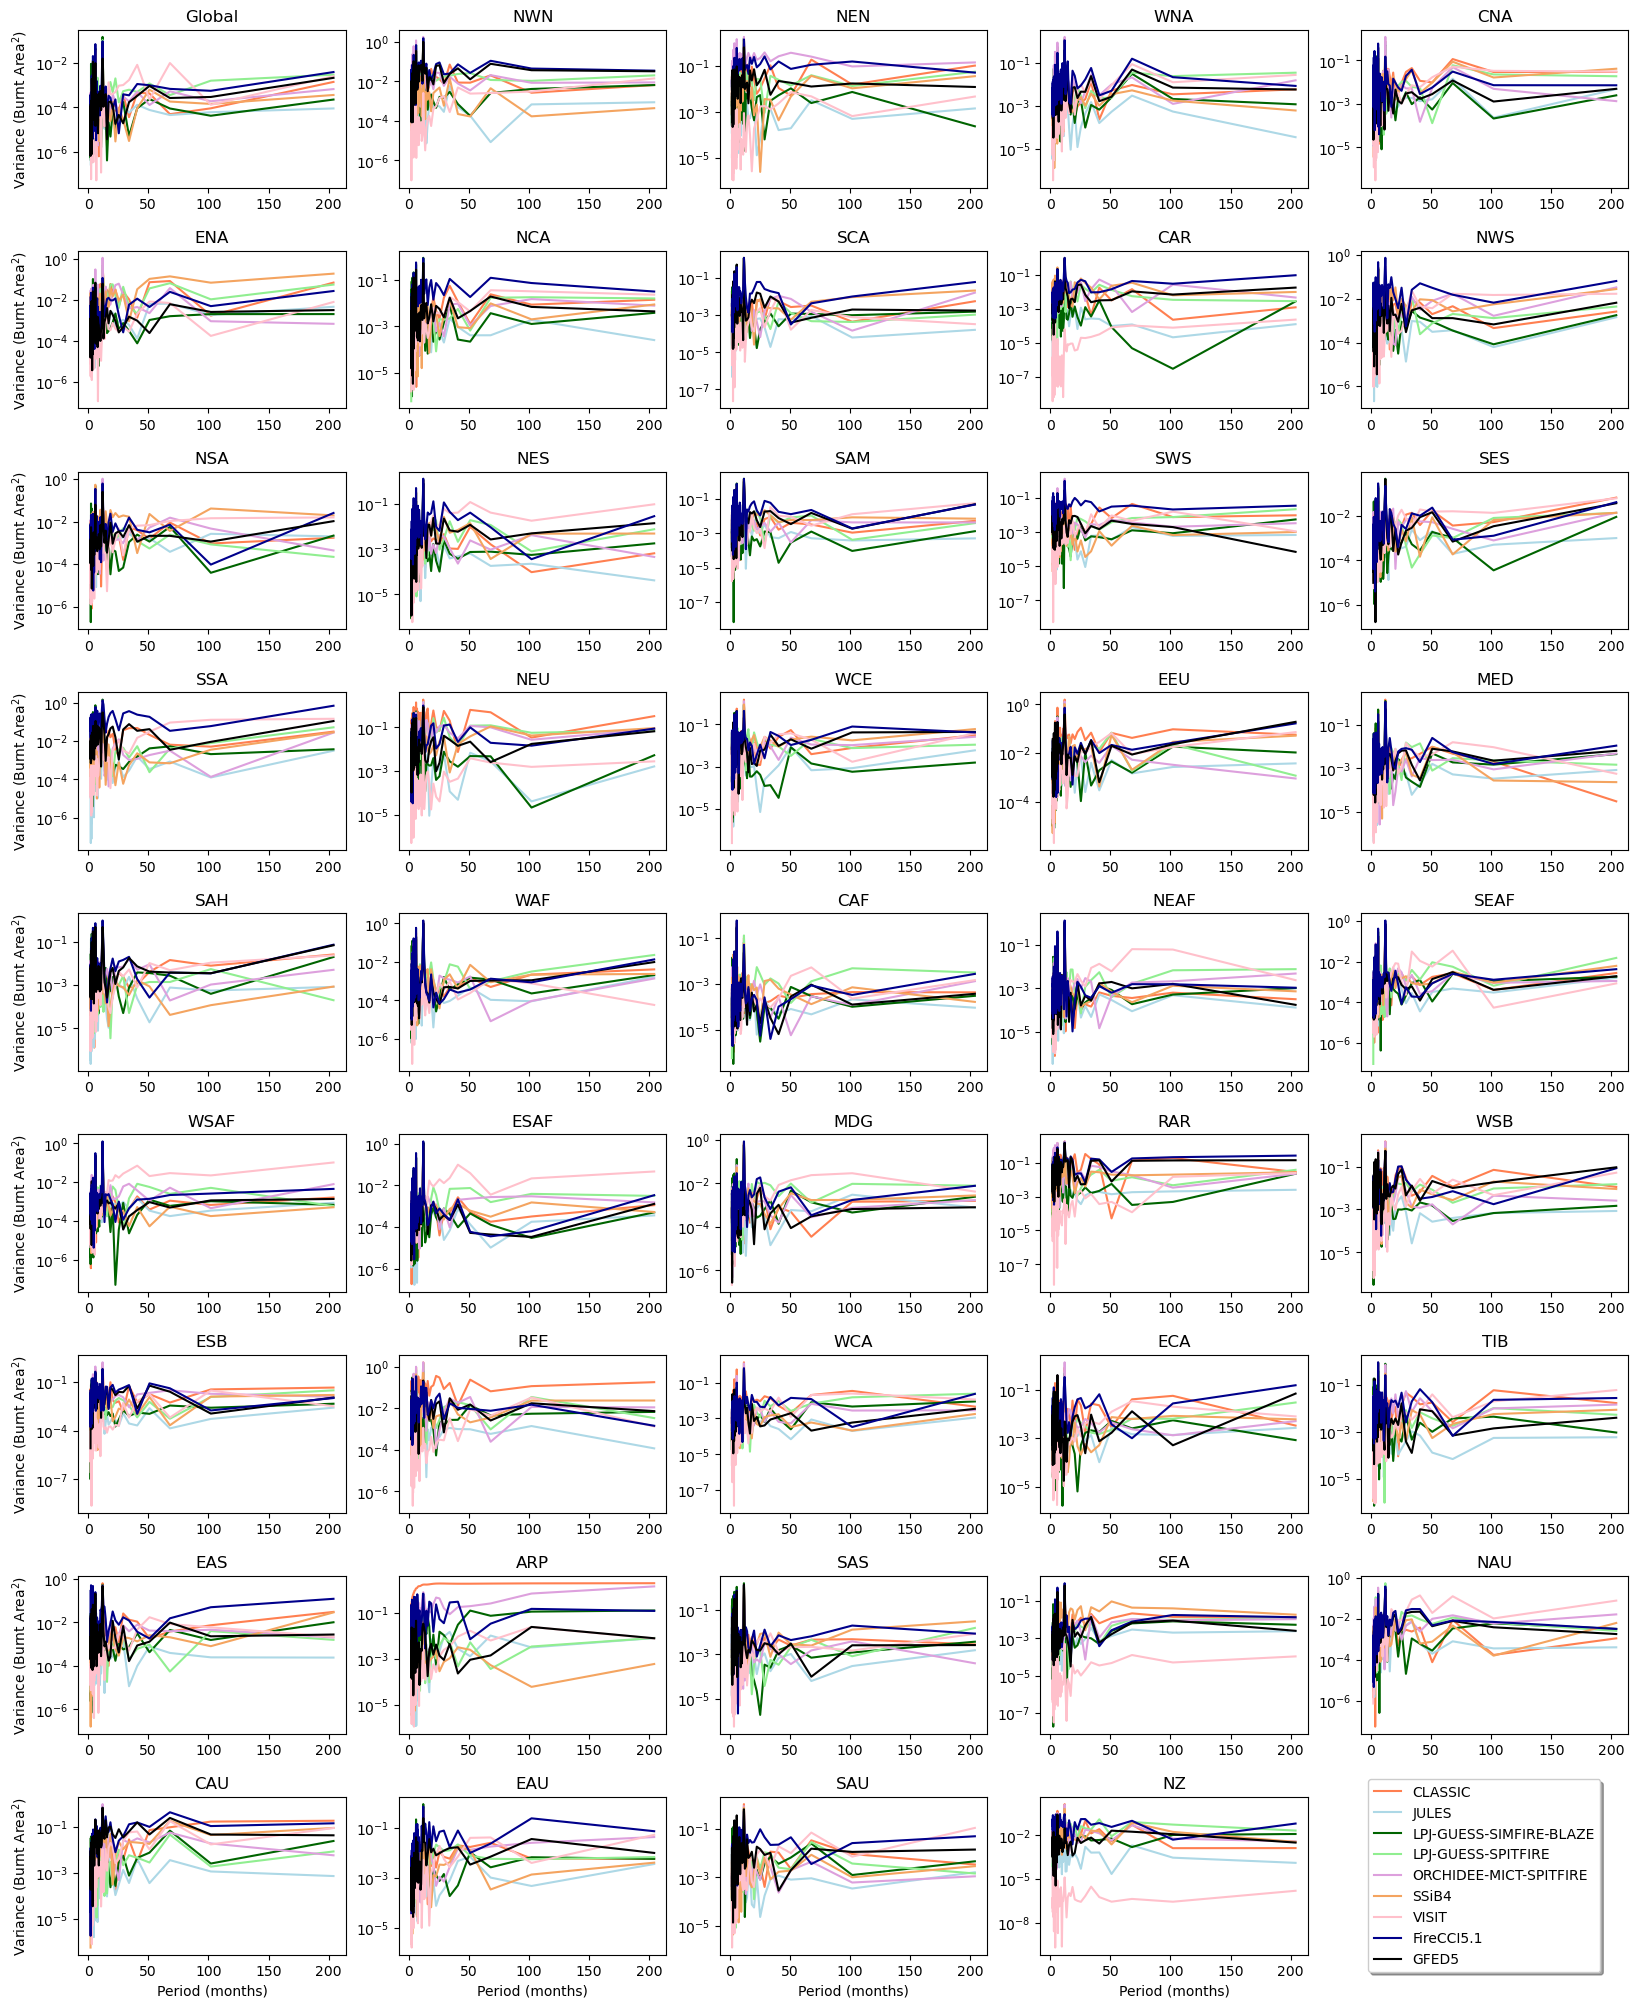

In [87]:
 
##For ALL Regions 

fig, axs = plt.subplots(9, 5, figsize=(20, 25))
axs = axs.ravel()
for idx, regionname in enumerate(obsclim_0319_Ranom.columns.unique(level='Region')):
    ax = axs[idx+1]
    for model_name in obsclim_0319_Ranom[regionname].columns: 
        f, sp = periodogram(obsclim_0319_Ranom[regionname][model_name], detrend='constant',scaling='spectrum')
        ax.plot(1./f, sp, color=model_colours[model_name], label=model_name)
    for obs_name in obs_0319_Ranom[regionname].columns:
        if obs_name == 'GFED5' or obs_name == 'FireCCI5.1':
            f, sp = periodogram(obs_0319_Ranom[regionname][obs_name], detrend='constant',scaling='spectrum')
            ax.plot(1./f, sp, color=obs_colours[obs_name], label=obs_name)  
    ax.set_yscale('log')
    ax.set_title(regionname)
    ax.set_xlabel(' ') 
    ax.set_ylabel(' ')    

plt.delaxes(axs[-1])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.2, 0.5), loc="center left",
          fancybox=True, shadow=True, ncol=1)

###One plot for global
ax = axs[0]
for model_name in obsclim_0319_Ranom_glob.columns:
    f, sp = periodogram(obsclim_0319_Ranom_glob[model_name], detrend='constant',scaling='spectrum')
    ax.plot(1./f, sp, color=model_colours[model_name], label=model_name)
for obs_name in obs_0319_Ranom_glob.columns:
    if obs_name == 'GFED5' or obs_name == 'FireCCI5.1':
        f, sp = periodogram(obs_0319_Ranom_glob[obs_name], detrend='constant',scaling='spectrum')
        ax.plot(1./f, sp, color=obs_colours[obs_name], label=obs_name)    
ax.set_yscale('log')
ax.set_xlabel(' ')
ax.set_ylabel(' ')
ax.set_title('Global')


#Set the axis labels
for ax in axs[40:44]:
    ax.set_xlabel('Period (months)')
PlotsNos = [0,5,10,15,20,25,30,35,40]   
for ax in axs[PlotsNos]:
    ax.set_ylabel('Variance (Burnt Area$^2$)')    
plt.subplots_adjust(hspace=0.4)   
#plt.tight_layout()
plt.savefig('/scratch/cburton/scratch/ISIMIP3a/Draft2.0/PowerSpectra_AR6regions_ALL_Ranom.png',facecolor='w', transparent=False)
plt.show()



# Selected Regions

/var/tmp/ipykernel_111120/995943838.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/995943838.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

/var/tmp/ipykernel_111120/995943838.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})
/var/tmp/ipykernel_111120/995943838.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

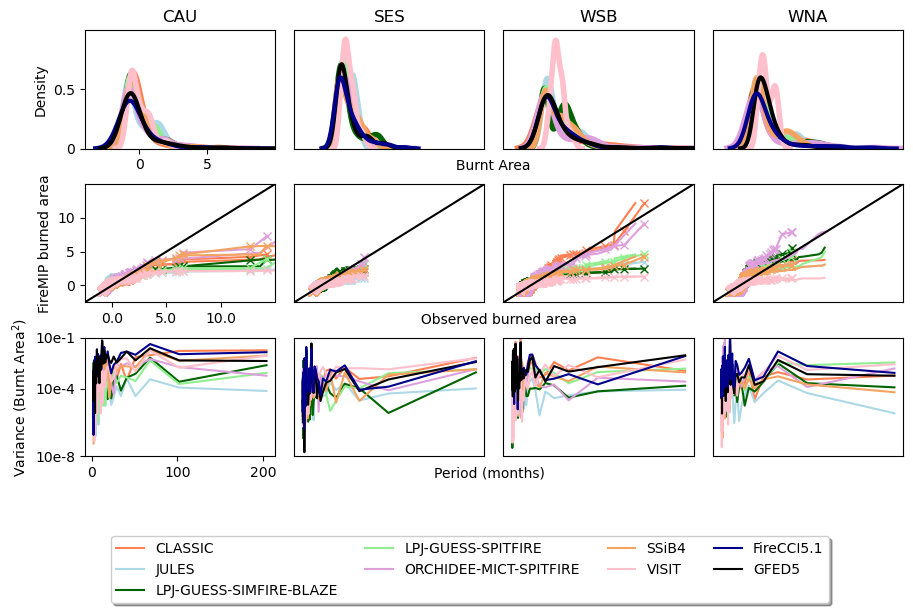

In [89]:
#SelectedRegions = [ 'SES', 'SAU', 'WNA', 'MED',]
SelectedRegions = ['CAU', 'SES','WSB', 'WNA']



fig, axs = plt.subplots(3, 4, figsize=(9, 5))
axs = axs.ravel() 

#PDF
for idx, regionname in enumerate(SelectedRegions):
    ax = axs[idx]
    for model_name in obsclim_0319_Ranom[regionname].columns: 
        #if model_name != 'VISIT':    
            data = obsclim_0319_Ranom[regionname][model_name]
            sns.distplot(data, hist=False, kde=True,  label=model_name, ax=ax, kde_kws={'linewidth': 4,'color':model_colours[model_name]})                
    for obs_name in obs_0319_Ranom[regionname].columns:
        if obs_name == 'GFED5' or obs_name == 'FireCCI5.1':
            data = obs_0319_Ranom[regionname][obs_name]
            sns.distplot(data, hist=False, kde=True, label=obs_name, ax=ax, kde_kws={'linewidth': 3,'color':obs_colours[obs_name]})
    ax.set_title(regionname)
    ax.set_xlabel(' ') 
    ax.set_ylabel(' ') 
    #ax.set_ylim(0,0.8)
    ax.set_ylim(0,1.0)
    ax.set_xlim(-4,10) 
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    plt.tight_layout()

    
#QQ    
for idx, regionname in enumerate(SelectedRegions):
    ax = axs[idx+4]
    for model_name in obsclim_0319_Ranom[regionname].columns:
        ax.plot(np.sort(obs_0319_Ranom[regionname]['GFED5']), np.sort(obsclim_0319_Ranom[regionname][model_name]), marker='x', color=model_colours[model_name], label=model_name)
        ax.plot(np.sort(obs_0319_Ranom[regionname]['FireCCI5.1']), np.sort(obsclim_0319_Ranom[regionname][model_name]), color=model_colours[model_name])
    axis_min=-2.5
    axix_max=15.0#10.0
    ax.plot([axis_min,axix_max],[axis_min,axix_max],color="k")
    ax.set_ylim(axis_min,axix_max)
    ax.set_xlim(axis_min,axix_max)    
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_xlabel(' ') 
    ax.set_ylabel(' ') 
    

##power
   
for idx, regionname in enumerate(SelectedRegions):
    ax = axs[idx+8]
    for model_name in obsclim_0319_Ranom[regionname].columns: 
        f, sp = periodogram(obsclim_0319_Ranom[regionname][model_name], detrend='constant',scaling='spectrum')
        ax.plot(1./f, sp, color=model_colours[model_name], label=model_name)     
    for obs_name in obs_0319_Ranom[regionname].columns:
        if obs_name == 'GFED5' or obs_name == 'FireCCI5.1':
            f, sp = periodogram(obs_0319_Ranom[regionname][obs_name], detrend='constant',scaling='spectrum')
            ax.plot(1./f, sp, color=obs_colours[obs_name], label=obs_name)   
    ax.set_yscale('log')
    ax.set_xlabel(' ') 
    ax.set_ylabel(' ')
    ax.set_ylim(10e-8,10e-1)
    ax.set_xticks([], [])
    ax.set_yticks([], [])

box = axs[8].get_position()
axs[8].set_position([box.x0, box.y0, box.width * 0.9, box.height])
axs[8].legend(bbox_to_anchor=(0.1, -1.3), loc="lower left",
          fancybox=True, shadow=True, ncol=4)

axs[0].set_ylabel('Density') 
axs[0].set_yticks([0,0.5],['0', '0.5']) 
axs[0].set_xticks([0,5], ['0','5']) 
axs[4].set_ylabel('FireMIP burned area')
axs[4].set_yticks([0,5,10],['0', '5', '10']) 
axs[4].set_xticks([0.0,5.0,10.0], ['0.0','5.0','10.0']) 
axs[8].set_ylabel('Variance (Burnt Area$^2$)')
axs[8].set_yticks([10e-8,10e-4,10e-1],['10e-8','10e-4','10e-1']) 
axs[8].set_xticks([0,100,200], ['0','100','200']) 
axs[1].set_xlabel('                                     Burnt Area', loc="left")     
axs[5].set_xlabel('                             Observed burned area', loc="left")     
axs[9].set_xlabel('                                Period (months)', loc="left")     

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.savefig('/scratch/cburton/scratch/ISIMIP3a/Draft2.0/Validation_4RegionsALT.png',facecolor='w', transparent=False)    
plt.show()

    

# Apply Model Weighting - Global bootstrap 

/var/tmp/ipykernel_111120/1847676974.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(obsclim_unweighted, kde=True, color="blue",label='factual',fit_kws={"linewidth":2.5,"color":"darkblue"})
/var/tmp/ipykernel_111120/1847676974.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(counterclim

9997
Empirical mean HIST: 42.24891899747341
Empirical mean HISTNAT: 37.49470614756226
Bootstrap replicates mean HIST: 42.83719
Bootstrap replicates mean HISTNAT: 37.883884
The confidence interval for obsclim:  [19.33177757 80.10212708]
The confidence interval for counterclim:  [15.95806599 75.54807281]


/var/tmp/ipykernel_111120/1847676974.py:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Counterclim, kde=True, color="orange",label='c.factual',fit_kws={"linewidth":2.5,"color":"darkorange"})


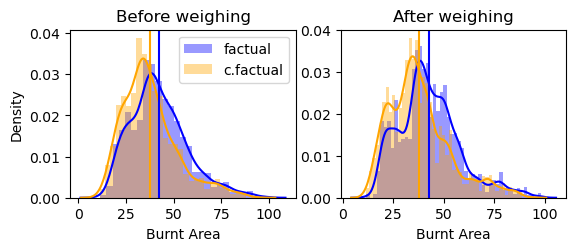

Stat =  KstestResult(statistic=0.19515854756426929, pvalue=7.655305933207395e-167)
Risk Ratio =  1.4410583510512638


In [91]:


#Global
obsclim_unweighted = []
for model_name in obsclim_0319_glob:
    for i in (obsclim_0319_glob[model_name]):
        obsclim_unweighted.append(i)
        
counterclim_unweighted = []
for model_name in obsclim_0319_glob:
    for i in (counterclim_0319_glob[model_name]):
        counterclim_unweighted.append(i)

#Plot before weighting
plt.subplot(2,2,1)
sns.distplot(obsclim_unweighted, kde=True, color="blue",label='factual',fit_kws={"linewidth":2.5,"color":"darkblue"})
sns.distplot(counterclim_unweighted, kde=True, color="orange",label='c.factual',fit_kws={"linewidth":2.5,"color":"darkorange"})
plt.axvline(x=np.nanmean(obsclim_unweighted) , color='blue')
plt.axvline(x=np.nanmean(counterclim_unweighted), color='orange')
plt.xlabel('Burnt Area')
plt.title('Before weighing')
plt.legend(loc='best')  
 
def draw_bs_replicates(data,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    bs_sample = np.random.choice(data,size=size)
    return bs_sample

#Global Weighting
#Draw n bootstrap replicates multiplied by the weight of the model (10,000=1.0, 1000=0.1)
ObsclimArray = []
CounterclimArray = []

for model_name in obsclim_0319_glob: 
    ObsclimArray.append(draw_bs_replicates(obsclim_0319_glob[model_name], np.int(10000*weights['Global'][model_name][0])))   
for model_name in counterclim_0319_glob:
    CounterclimArray.append(draw_bs_replicates(counterclim_0319_glob[model_name],  np.int(10000*weights['Global'][model_name][0])))

Obsclim = []
for n in np.arange(0,7):
    for i in ObsclimArray[n]:
        Obsclim.append(i)

Counterclim = []
for n in np.arange(0,7):
    for i in CounterclimArray[n]:
        Counterclim.append(i)

print(len(Obsclim))
### Print empirical mean 
print("Empirical mean HIST: " + str(np.mean(np.array(obsclim_unweighted))))
print("Empirical mean HISTNAT: " + str(np.mean(np.array(counterclim_unweighted))))
## Print the mean of bootstrap replicates
print("Bootstrap replicates mean HIST: " + str(np.mean(Obsclim)))
print("Bootstrap replicates mean HISTNAT: " + str(np.mean(Counterclim)))


# Showing the related percentiles
x1 = np.percentile(Obsclim,[2.5])
x2 = np.percentile(Obsclim,[97.5])
x3 = np.percentile(Obsclim,[66])
x4 = np.percentile(Counterclim,[2.5])
x5 = np.percentile(Counterclim,[97.5])
x6 = np.percentile(Counterclim,[66])

# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval_HIST = np.percentile(Obsclim,[2.5,97.5])
conf_interval_HISTNAT = np.percentile(Counterclim,[2.5,97.5])

# Print the interval
print("The confidence interval for obsclim: ",conf_interval_HIST)
print("The confidence interval for counterclim: ",conf_interval_HISTNAT)
    
#Plot after weighting - my way
plt.subplot(2,2,2)
sns.distplot(Obsclim, kde=True, color="blue",label='factual',fit_kws={"linewidth":2.5,"color":"darkblue"})
sns.distplot(Counterclim, kde=True, color="orange",label='c.factual',fit_kws={"linewidth":2.5,"color":"darkorange"})
plt.axvline(x=np.nanmean(Obsclim) , color='blue')
plt.axvline(x=np.nanmean(Counterclim), color='orange')

#plt.axvline(x=x1, ymin=0, ymax=1,label='2.5th percentile '+str("%.4f" % x1),c='y', ls='dashed')
#plt.axvline(x=x2, ymin=0, ymax=1,label='97.5th percentile '+str("%.4f" % x2),c='r', ls='dashed')
#plt.axvline(x=x3, ymin=0, ymax=1,label='66th percentile '+str("%.4f" % x3),c='g', ls='dashed')
#plt.axvline(x=x4, ymin=0, ymax=1,label='2.5th percentile '+str("%.4f" % x4),c='y')
#plt.axvline(x=x5, ymin=0, ymax=1,label='97.5th percentile '+str("%.4f" % x5),c='r')
#plt.axvline(x=x6, ymin=0, ymax=1,label='66th percentile '+str("%.4f" % x6),c='g')

plt.xlabel('Burnt Area')
plt.ylabel(' ')
plt.title('After weighing')
plt.show()


test1=Obsclim
test2=Counterclim
stat = stats.kstest(test1, test2) 
print('Stat = ', stat)  
ALL = (np.count_nonzero(Obsclim> (np.nanmean(Counterclim))))
NAT = (np.count_nonzero(Counterclim > (np.nanmean(Counterclim))))
RR = ALL/NAT
print('Risk Ratio = ', RR)

# Bootstrapping with weighting for each region

/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

NWN 1.0495958853783982 KstestResult(statistic=0.05381614484345303, pvalue=5.265235341630479e-13)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

NEN 0.9783567134268537 KstestResult(statistic=0.03551420568227291, pvalue=6.679840838086737e-06)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

WNA 1.1338729763387299 KstestResult(statistic=0.07593037214885955, pvalue=1.775366558838425e-25)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

CNA 1.1205128205128205 KstestResult(statistic=0.05792896448224112, pvalue=5.3331888865999476e-15)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

ENA 1.0320602174519096 KstestResult(statistic=0.03461038311493448, pvalue=1.2574519547185102e-05)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

NCA 1.2710594315245478 KstestResult(statistic=0.12454981992797119, pvalue=6.1031529609659626e-68)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

SCA 1.0324175824175825 KstestResult(statistic=0.04461338401520456, pvalue=4.541394334667454e-09)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

CAR 0.992588369441277 KstestResult(statistic=0.054121648659463784, pvalue=3.7965668315251584e-13)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

NWS 1.1157517899761336 KstestResult(statistic=0.06983491745872937, pvalue=1.3039627598057999e-21)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

NSA 0.8894317305219851 KstestResult(statistic=0.06021806541962589, pvalue=3.5363977767598743e-16)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

NES 0.8904872389791183 KstestResult(statistic=0.07831566313262653, pvalue=4.4018205719988276e-27)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

SAM 1.0295959021058623 KstestResult(statistic=0.04841452435730719, pvalue=1.3209865347539458e-10)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

SWS 1.4073120494335736 KstestResult(statistic=0.18755626688006402, pvalue=4.710500077395272e-154)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

SES 1.3311241396890134 KstestResult(statistic=0.17446978791516607, pvalue=3.0475163995700053e-133)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

SSA 1.3131088227108265 KstestResult(statistic=0.16636654661864747, pvalue=3.9032424360042855e-121)


/var/tmp/ipykernel_111120/52001968.py:48: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Obsclim, hist=True, kde=True, ax=ax,  label='factual', color='blue' )
/var/tmp/ipykernel_111120/52001968.py:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Counterclim, hist=True, kde=True, ax=ax,  label='c

NEU 1.244131455399061 KstestResult(statistic=0.06872749099639856, pvalue=6.030164469837416e-21)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

WCE 1.1987933634992458 KstestResult(statistic=0.09183673469387756, pvalue=4.340546199265098e-37)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

EEU 1.1778728606356967 KstestResult(statistic=0.09693877551020408, pvalue=2.780163076934911e-41)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

MED 1.1601836844948676 KstestResult(statistic=0.07761552310462093, pvalue=1.31405306922798e-26)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

SAH 1.325635103926097 KstestResult(statistic=0.15614684405321597, pvalue=1.0345889538124151e-106)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

WAF 0.9770087698506755 KstestResult(statistic=0.031312525010004, pvalue=0.00011068913291317576)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

CAF 1.3501103752759382 KstestResult(statistic=0.1674669867947179, pvalue=9.586080352406943e-123)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

NEAF 1.0919569672131149 KstestResult(statistic=0.0733219965989797, pvalue=8.711122821265885e-24)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

SEAF 1.0794180777486286 KstestResult(statistic=0.06521956586976092, pvalue=6.626261887575465e-19)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

WSAF 1.1019617340760475 KstestResult(statistic=0.07052821128451381, pvalue=4.897963544395363e-22)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

ESAF 1.064102564102564 KstestResult(statistic=0.08383353341336534, pvalue=5.707541428715248e-31)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

MDG 1.0881968641114983 KstestResult(statistic=0.09073629451780713, pvalue=3.251849593037212e-36)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

RAR 0.8945958016971862 KstestResult(statistic=0.024509803921568627, pvalue=0.0049317779577292935)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

WSB 1.307152496626181 KstestResult(statistic=0.1479443833149945, pvalue=8.47707618082819e-96)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

ESB 1.0117501546072976 KstestResult(statistic=0.0739221766529959, pvalue=3.595124613038147e-24)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

RFE 0.7645221736414741 KstestResult(statistic=0.1057422969187675, pvalue=4.695492290643658e-49)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

WCA 1.2781707933299646 KstestResult(statistic=0.1731519455836751, pvalue=3.0193148336631924e-131)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

ECA 1.4217434373452205 KstestResult(statistic=0.1988596578973692, pvalue=2.944227931112332e-173)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

TIB 1.5517970401691332 KstestResult(statistic=0.27548264479343804, pvalue=1e-323)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

EAS 0.9394011976047905 KstestResult(statistic=0.02781112444977991, pvalue=0.0008770421335306413)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

ARP 1.1788448155880307 KstestResult(statistic=0.069827931172469, pvalue=1.310351957291519e-21)


/var/tmp/ipykernel_111120/52001968.py:48: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Obsclim, hist=True, kde=True, ax=ax,  label='factual', color='blue' )
/var/tmp/ipykernel_111120/52001968.py:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Counterclim, hist=True, kde=True, ax=ax,  label='c

SAS 0.9886621315192744 KstestResult(statistic=0.019507803121248498, pvalue=0.04455920795993511)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

SEA 0.7267005567659163 KstestResult(statistic=0.14104231269380815, pvalue=4.453910238986164e-87)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

NAU 1.2 KstestResult(statistic=0.09292787836350905, pvalue=5.703244198607509e-38)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

CAU 1.5010463378176382 KstestResult(statistic=0.1964392878575715, pvalue=4.5839190933615446e-169)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

EAU 1.2939197930142303 KstestResult(statistic=0.11814725890356143, pvalue=3.6675045949922814e-61)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

SAU 1.2336727092128135 KstestResult(statistic=0.1122336701010303, pvalue=3.157488655242978e-55)


/var/tmp/ipykernel_111120/52001968.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))
/var/tmp/ipykernel_111120/52001968.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

NZ 1.070859167404783 KstestResult(statistic=0.02931172468987595, pvalue=0.00037223371512579514)
    statistic         pvalue
0    0.053816   5.265235e-13
1    0.035514   6.679841e-06
2    0.075930   1.775367e-25
3    0.057929   5.333189e-15
4    0.034610   1.257452e-05
5    0.124550   6.103153e-68
6    0.044613   4.541394e-09
7    0.054122   3.796567e-13
8    0.069835   1.303963e-21
9    0.060218   3.536398e-16
10   0.078316   4.401821e-27
11   0.048415   1.320987e-10
12   0.187556  4.710500e-154
13   0.174470  3.047516e-133
14   0.166367  3.903242e-121
15   0.068727   6.030164e-21
16   0.091837   4.340546e-37
17   0.096939   2.780163e-41
18   0.077616   1.314053e-26
19   0.156147  1.034589e-106
20   0.031313   1.106891e-04
21   0.167467  9.586080e-123
22   0.073322   8.711123e-24
23   0.065220   6.626262e-19
24   0.070528   4.897964e-22
25   0.083834   5.707541e-31
26   0.090736   3.251850e-36
27   0.024510   4.931778e-03
28   0.147944   8.477076e-96
29   0.073922   3.595125e-24
30   

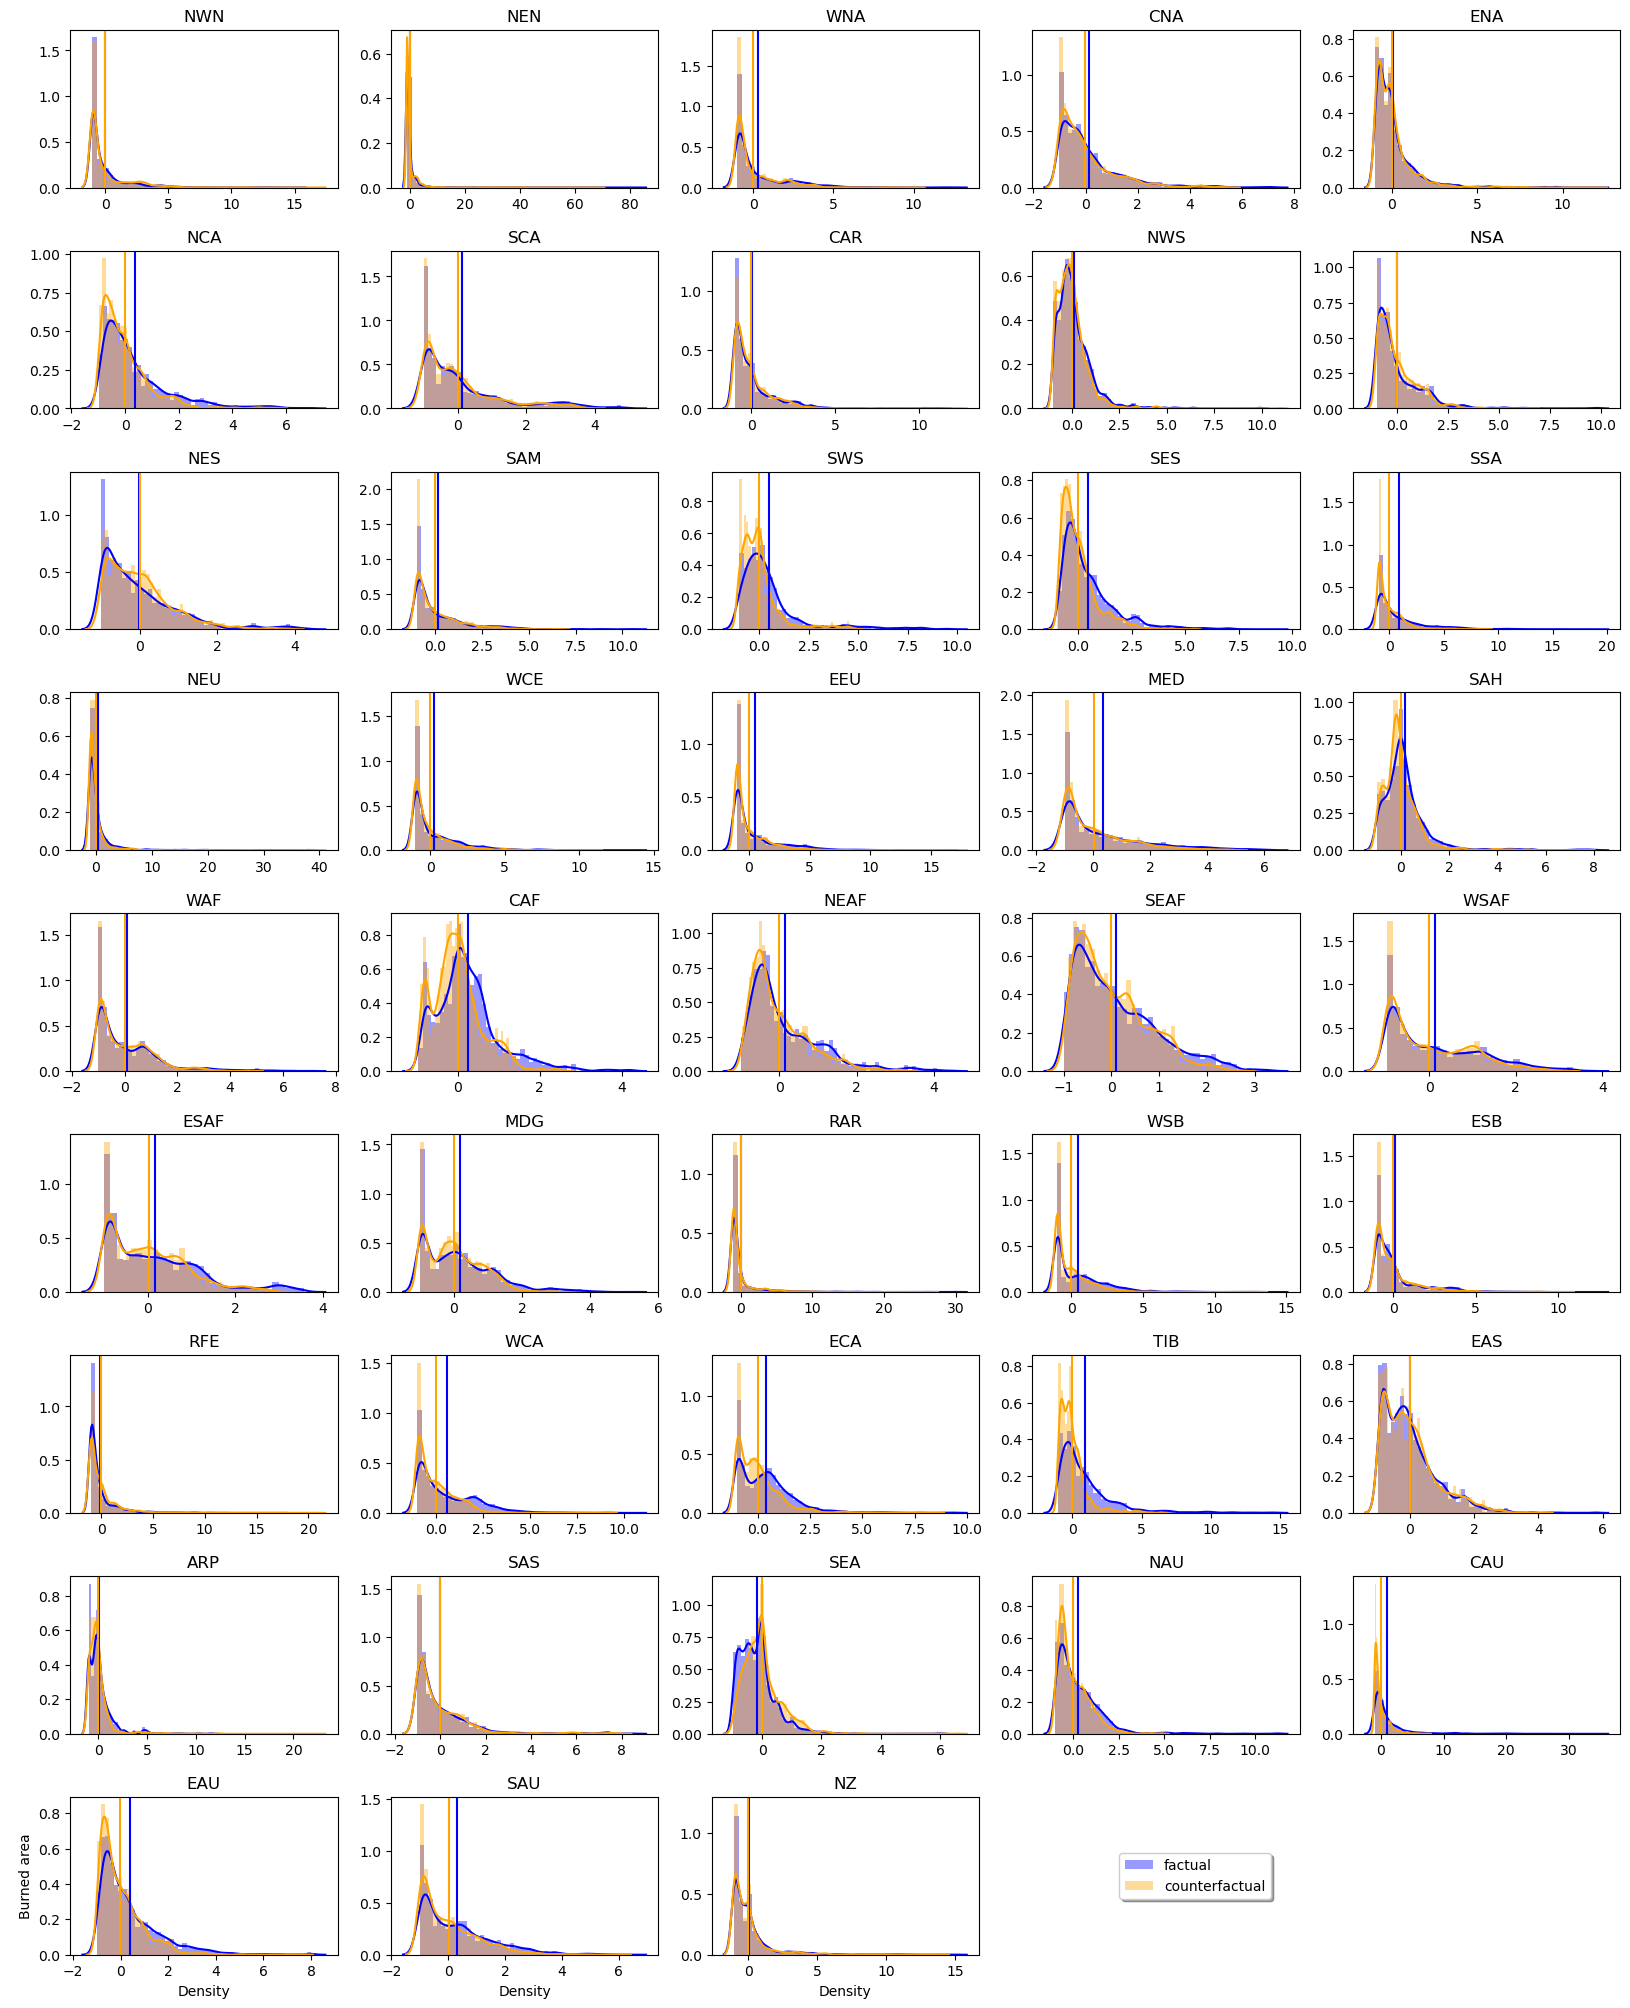

In [115]:
#obsclim_0319_Nanom = (obsclim_0319-counterclim_0319.mean())/counterclim_0319.mean()
#counterclim_0319_Nanom = (counterclim_0319-counterclim_0319.mean())/counterclim_0319.mean()


### By region
# Attribution PDF regionally
regionlist = []
RiskList = []
StatList = []

 
def draw_bs_replicates(data,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    bs_replicates = np.random.choice(data,size=size)
    return bs_replicates 

fig, axs = plt.subplots(9, 5, figsize=(20, 25))
axs = axs.ravel()


#Regional weighting
for idx, regionname in enumerate(obsclim_0319.columns.unique(level='Region')):
        ObsclimArray = []
        CounterclimArray = []
        for model_name in obsclim_0319[regionname].columns:
            obsclim_0319_Nanom = (obsclim_0319[regionname][model_name]-counterclim_0319[regionname][model_name].mean())/counterclim_0319[regionname][model_name].mean()
            ObsclimArray.append(draw_bs_replicates(obsclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))           
            counterclim_0319_Nanom = (counterclim_0319[regionname][model_name]-counterclim_0319[regionname][model_name].mean())/counterclim_0319[regionname][model_name].mean()
            CounterclimArray.append(draw_bs_replicates(counterclim_0319_Nanom, size=np.int(10000*Weights[regionname][model_name][0])))

        Obsclim = []
        for n in np.arange(0,7):
            for i in ObsclimArray[n]:
                i = ma.masked_where(np.isnan(i),i)
                i = ma.masked_where(np.isinf(i),i)
                Obsclim.append(i)  
    
        Counterclim = []
        for n in np.arange(0,7):
            for i in CounterclimArray[n]:
                i = ma.masked_where(np.isnan(i),i)
                i = ma.masked_where(np.isinf(i),i)
                Counterclim.append(i) 
    
        ax = axs[idx]
        sns.distplot(Obsclim, hist=True, kde=True, ax=ax,  label='factual', color='blue' ) 
        sns.distplot(Counterclim, hist=True, kde=True, ax=ax,  label='counterfactual',  color='orange')
        ax.axvline(x=np.nanmean(Obsclim), color='blue')
        ax.axvline(x=np.nanmean(Counterclim), color='orange')
        ax.set_title(regionname) 
        ax.set_xlabel(' ')
        ax.set_ylabel(' ')

        ALL = (np.count_nonzero(Obsclim > (np.nanmean(Counterclim))))
        NAT = (np.count_nonzero(Counterclim > (np.nanmean(Counterclim))))
        RR = ALL/NAT
        testc=(Obsclim)
        testd=(Counterclim)

        stat = stats.kstest(testc, testd)
        regionlist.append(regionname)
        RiskList.append(RR)
        StatList.append(stat)
        print(regionname, RR, stat)
    
df1 = pd.DataFrame(StatList)
df = pd.DataFrame(RiskList,regionlist)
print(df1)
print(df)

plt.delaxes(axs[-1])
plt.delaxes(axs[-2])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.5, 0.5), loc="center left",
          fancybox=True, shadow=True, ncol=1)

for ax in axs[40:44]:
    ax.set_xlabel('Density')
ax = axs[40]
ax.set_ylabel('Burned area')
plt.subplots_adjust(hspace=0.4)  

#plt.savefig('/scratch/cburton/scratch/ISIMIP3a/Draft2.0/AR6regions_weighted_Nanom.png',facecolor='w', transparent=False)    
plt.show()

# Four PDFs for Attribution - weighted, bootstap, relative anomaly from Nikos

/var/tmp/ipykernel_111120/1435596253.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimPIArray.append(draw_bs_replicates(obsclim_global_PI_Nanom[model_name], np.int(10000*weights['Global'][model_name][0])))
/var/tmp/ipykernel_111120/1435596253.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to re

PI
1.0215168299957393
KstestResult(statistic=0.03220966289886966, pvalue=6.25440545629925e-05)
1950
1.3659347970725215
KstestResult(statistic=0.1724517355206562, pvalue=3.4766409254453577e-130)
LUC
0.4553326293558606
KstestResult(statistic=0.35690707212163647, pvalue=0.0)
PD
1.410482374768089
KstestResult(statistic=0.18815644693408023, pvalue=4.812062700251021e-155)


/var/tmp/ipykernel_111120/1435596253.py:157: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ObsclimLUC, kde=True, color="blue",label='c.fact PD',fit_kws={"linewidth":2.5,"color":"darkblue"})
/var/tmp/ipykernel_111120/1435596253.py:158: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CounterclimLUC,

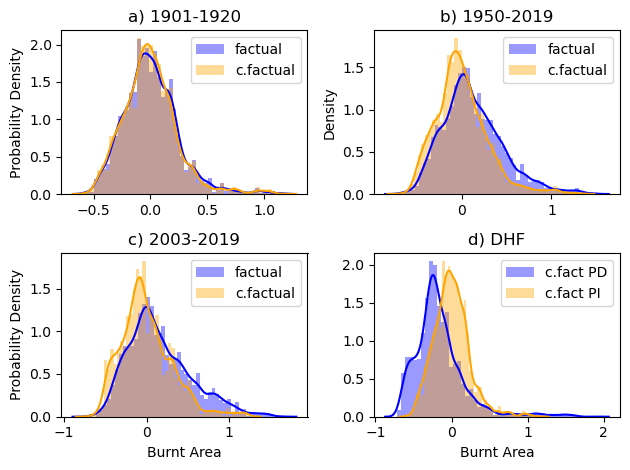

In [93]:
def draw_bs_replicates(data,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    bs_sample = np.random.choice(data,size=size)
    return bs_sample

obsclim_global_PI_Nanom = (obsclim_global_PI - counterclim_global_PI.mean())/counterclim_global_PI.mean()
counterclim_global_PI_Nanom = (counterclim_global_PI-counterclim_global_PI.mean())/counterclim_global_PI.mean()
obsclim_1950_glob_Nanom = (obsclim_global_1950-counterclim_global_1950.mean())/counterclim_global_1950.mean()
counterclim_1950_glob_Nanom = (counterclim_global_1950-counterclim_global_1950.mean())/counterclim_global_1950.mean()
obsclim_0319_glob_Nanom = (obsclim_0319_glob-counterclim_0319_glob.mean())/counterclim_0319_glob.mean()
counterclim_0319_glob_Nanom = (counterclim_0319_glob-counterclim_0319_glob.mean())/counterclim_0319_glob.mean()
counterclim_LUC_glob_Nanom = (counterclim_0319_glob-counterclim_global_PI.mean())/counterclim_global_PI.mean()

#PI
ObsclimPIArray = []
CounterclimPIArray = []

for model_name in obsclim_global_PI_Nanom: 
    ObsclimPIArray.append(draw_bs_replicates(obsclim_global_PI_Nanom[model_name], np.int(10000*weights['Global'][model_name][0])))   
    CounterclimPIArray.append(draw_bs_replicates(counterclim_global_PI_Nanom[model_name],  np.int(10000*weights['Global'][model_name][0])))

ObsclimPI = []
for n in np.arange(0,7):
    for i in ObsclimPIArray[n]:
        ObsclimPI.append(i)

CounterclimPI = []
for n in np.arange(0,7):
    for i in CounterclimPIArray[n]:
        CounterclimPI.append(i)
        
plt.subplot(2,2,1)
sns.distplot(ObsclimPI, kde=True, color="blue",label='factual',fit_kws={"linewidth":2.5,"color":"darkblue"})
sns.distplot(CounterclimPI, kde=True, color="orange",label='c.factual',fit_kws={"linewidth":2.5,"color":"darkorange"})
plt.legend(loc='best')
plt.title('a) 1901-1920')
plt.ylabel('Probability Density')



#1950
Obsclim1950Array = []
Counterclim1950Array = []

for model_name in obsclim_1950_glob_Nanom: 
    Obsclim1950Array.append(draw_bs_replicates(obsclim_1950_glob_Nanom[model_name], np.int(10000*weights['Global'][model_name][0])))   
    Counterclim1950Array.append(draw_bs_replicates(counterclim_1950_glob_Nanom[model_name],  np.int(10000*weights['Global'][model_name][0])))

Obsclim1950 = []
for n in np.arange(0,7):
    for i in Obsclim1950Array[n]:
        Obsclim1950.append(i)

Counterclim1950 = []
for n in np.arange(0,7):
    for i in Counterclim1950Array[n]:
        Counterclim1950.append(i)

plt.subplot(2,2,2)
sns.distplot(Obsclim1950, kde=True, color="blue",label='factual',fit_kws={"linewidth":2.5,"color":"darkblue"})
sns.distplot(Counterclim1950, kde=True, color="orange",label='c.factual',fit_kws={"linewidth":2.5,"color":"darkorange"})
#plt.axvline(x=np.nanmean(Obsclim1950) , color='blue')
#plt.axvline(x=np.nanmean(Counterclim1950), color='orange')
plt.title('b) 1950-2019')
plt.legend(loc='best')



#2003-2019
ObsclimArray = []
CounterclimArray = []

for model_name in obsclim_0319_glob_Nanom: 
    ObsclimArray.append(draw_bs_replicates(obsclim_0319_glob_Nanom[model_name], np.int(10000*weights['Global'][model_name][0])))   
    CounterclimArray.append(draw_bs_replicates(counterclim_0319_glob_Nanom[model_name],  np.int(10000*weights['Global'][model_name][0])))

Obsclim = []
for n in np.arange(0,7):
    for i in ObsclimArray[n]:
        Obsclim.append(i)

Counterclim = []
for n in np.arange(0,7):
    for i in CounterclimArray[n]:
        Counterclim.append(i)


plt.subplot(2,2,3)
sns.distplot(Obsclim, kde=True, color="blue",label='factual',fit_kws={"linewidth":2.5,"color":"darkblue"})
sns.distplot(Counterclim, kde=True, color="orange",label='c.factual',fit_kws={"linewidth":2.5,"color":"darkorange"})
#plt.axvline(x=np.nanmean(Obsclim) , color='blue')
#plt.axvline(x=np.nanmean(Counterclim), color='orange')
plt.title('c) 2003-2019')
plt.legend(loc='best')
plt.xlabel('Burnt Area')
plt.ylabel('Probability Density')



#LUC
ObsclimLUCArray = []
CounterclimLUCArray = []

for model_name in counterclim_LUC_glob_Nanom: 
    ObsclimLUCArray.append(draw_bs_replicates(counterclim_LUC_glob_Nanom[model_name], np.int(10000*weights['Global'][model_name][0])))   
    CounterclimLUCArray.append(draw_bs_replicates(counterclim_global_PI_Nanom[model_name],  np.int(10000*weights['Global'][model_name][0])))

ObsclimLUC = []
for n in np.arange(0,7):
    for i in ObsclimLUCArray[n]:
        ObsclimLUC.append(i)

CounterclimLUC = []
for n in np.arange(0,7):
    for i in CounterclimLUCArray[n]:
        CounterclimLUC.append(i)

        
#Print Results
ALL_PI = (np.count_nonzero(ObsclimPI > (np.nanmean(CounterclimPI))))
NAT_PI = (np.count_nonzero(CounterclimPI > (np.nanmean(CounterclimPI))))
RR_PI = ALL_PI/NAT_PI
stat_PI = stats.kstest(ObsclimPI, CounterclimPI)
print('PI')
print(RR_PI)
print(stat_PI)

ALL_1950 = (np.count_nonzero(Obsclim1950 > (np.nanmean(Counterclim1950))))
NAT_1950 = (np.count_nonzero(Counterclim1950 > (np.nanmean(Counterclim1950))))
RR_1950 = ALL_1950/NAT_1950
stat_1950 = stats.kstest(Obsclim1950, Counterclim1950)
print('1950')
print(RR_1950)
print(stat_1950)

ALL_LUC = (np.count_nonzero(ObsclimLUC > (np.nanmean(CounterclimLUC))))
NAT_LUC = (np.count_nonzero(CounterclimLUC > (np.nanmean(CounterclimLUC))))
RR_LUC = ALL_LUC/NAT_LUC
stat_LUC = stats.kstest(ObsclimLUC, CounterclimLUC)
print('LUC')
print(RR_LUC)
print(stat_LUC)

ALL_PD = (np.count_nonzero(Obsclim > (np.nanmean(Counterclim))))
NAT_PD = (np.count_nonzero(Counterclim > (np.nanmean(Counterclim))))
RR_PD = ALL_PD/NAT_PD
stat_PD = stats.kstest(Obsclim, Counterclim)
print('PD')
print(RR_PD)
print(stat_PD)



plt.subplot(2,2,4)
sns.distplot(ObsclimLUC, kde=True, color="blue",label='c.fact PD',fit_kws={"linewidth":2.5,"color":"darkblue"})
sns.distplot(CounterclimLUC, kde=True, color="orange",label='c.fact PI',fit_kws={"linewidth":2.5,"color":"darkorange"})
#plt.axvline(x=np.nanmean(ObsclimLUC) , color='blue')
#plt.axvline(x=np.nanmean(CounterclimLUC), color='orange')
plt.legend(loc='best')
plt.title('d) DHF')
plt.ylabel(' ')
plt.xlabel('Burnt Area')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('/scratch/cburton/scratch/ISIMIP3a/Draft2.0/4pdfs_weighted.png',facecolor='w', transparent=False)    
plt.show()

# Alternative PDF figure, with percentile plot

/var/tmp/ipykernel_111120/2226476191.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ObsclimPIArray.append(draw_bs_replicates(obsclim_global_PI_Nanom[model_name], np.int(10000*weights['Global'][model_name][0])))
/var/tmp/ipykernel_111120/2226476191.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to re

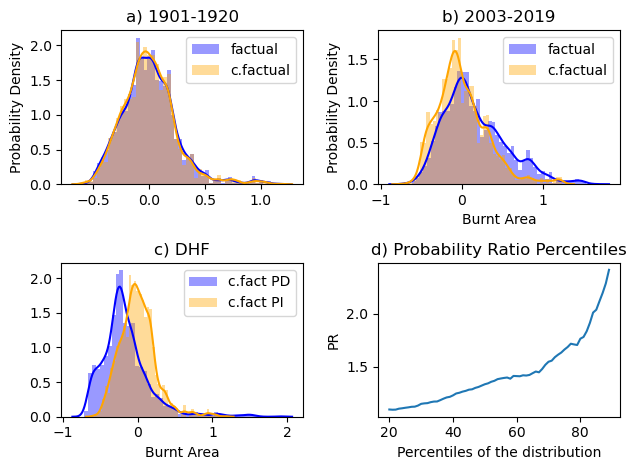

In [151]:
def draw_bs_replicates(data,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    bs_sample = np.random.choice(data,size=size)
    return bs_sample

obsclim_global_PI_Nanom = (obsclim_global_PI - counterclim_global_PI.mean())/counterclim_global_PI.mean()
counterclim_global_PI_Nanom = (counterclim_global_PI-counterclim_global_PI.mean())/counterclim_global_PI.mean()
obsclim_1950_glob_Nanom = (obsclim_global_1950-counterclim_global_1950.mean())/counterclim_global_1950.mean()
counterclim_1950_glob_Nanom = (counterclim_global_1950-counterclim_global_1950.mean())/counterclim_global_1950.mean()
obsclim_0319_glob_Nanom = (obsclim_0319_glob-counterclim_0319_glob.mean())/counterclim_0319_glob.mean()
counterclim_0319_glob_Nanom = (counterclim_0319_glob-counterclim_0319_glob.mean())/counterclim_0319_glob.mean()
counterclim_LUC_glob_Nanom = (counterclim_0319_glob-counterclim_global_PI.mean())/counterclim_global_PI.mean()

#PI
ObsclimPIArray = []
CounterclimPIArray = []

for model_name in obsclim_global_PI_Nanom: 
    ObsclimPIArray.append(draw_bs_replicates(obsclim_global_PI_Nanom[model_name], np.int(10000*weights['Global'][model_name][0])))   
    CounterclimPIArray.append(draw_bs_replicates(counterclim_global_PI_Nanom[model_name],  np.int(10000*weights['Global'][model_name][0])))

ObsclimPI = []
for n in np.arange(0,7):
    for i in ObsclimPIArray[n]:
        ObsclimPI.append(i)

CounterclimPI = []
for n in np.arange(0,7):
    for i in CounterclimPIArray[n]:
        CounterclimPI.append(i)
        
plt.subplot(2,2,1)
sns.distplot(ObsclimPI, kde=True, color="blue",label='factual',fit_kws={"linewidth":2.5,"color":"darkblue"})
sns.distplot(CounterclimPI, kde=True, color="orange",label='c.factual',fit_kws={"linewidth":2.5,"color":"darkorange"})
plt.legend(loc='best')
plt.title('a) 1901-1920')
plt.ylabel('Probability Density')


#2003-2019
ObsclimArray = []
CounterclimArray = []

for model_name in obsclim_0319_glob_Nanom: 
    ObsclimArray.append(draw_bs_replicates(obsclim_0319_glob_Nanom[model_name], np.int(10000*weights['Global'][model_name][0])))   
    CounterclimArray.append(draw_bs_replicates(counterclim_0319_glob_Nanom[model_name],  np.int(10000*weights['Global'][model_name][0])))

Obsclim = []
for n in np.arange(0,7):
    for i in ObsclimArray[n]:
        Obsclim.append(i)

Counterclim = []
for n in np.arange(0,7):
    for i in CounterclimArray[n]:
        Counterclim.append(i)


plt.subplot(2,2,2)
sns.distplot(Obsclim, kde=True, color="blue",label='factual',fit_kws={"linewidth":2.5,"color":"darkblue"})
sns.distplot(Counterclim, kde=True, color="orange",label='c.factual',fit_kws={"linewidth":2.5,"color":"darkorange"})
#plt.axvline(x=np.nanmean(Obsclim) , color='blue')
#plt.axvline(x=np.nanmean(Counterclim), color='orange')
plt.title('b) 2003-2019')
plt.legend(loc='best')
plt.xlabel('Burnt Area')
plt.ylabel('Probability Density')

#LUC
ObsclimLUCArray = []
CounterclimLUCArray = []

for model_name in counterclim_LUC_glob_Nanom: 
    ObsclimLUCArray.append(draw_bs_replicates(counterclim_LUC_glob_Nanom[model_name], np.int(10000*weights['Global'][model_name][0])))   
    CounterclimLUCArray.append(draw_bs_replicates(counterclim_global_PI_Nanom[model_name],  np.int(10000*weights['Global'][model_name][0])))

ObsclimLUC = []
for n in np.arange(0,7):
    for i in ObsclimLUCArray[n]:
        ObsclimLUC.append(i)

CounterclimLUC = []
for n in np.arange(0,7):
    for i in CounterclimLUCArray[n]:
        CounterclimLUC.append(i)

plt.subplot(2,2,3)
sns.distplot(ObsclimLUC, kde=True, color="blue",label='c.fact PD',fit_kws={"linewidth":2.5,"color":"darkblue"})
sns.distplot(CounterclimLUC, kde=True, color="orange",label='c.fact PI',fit_kws={"linewidth":2.5,"color":"darkorange"})
plt.legend(loc='best')
plt.title('c) DHF')
plt.ylabel(' ')
plt.xlabel('Burnt Area')
plt.legend(loc='best')        


#Quantiles
quantiles = np.arange(20, 90, 1)
PRlist = []
for quantile in quantiles:
    ALL = (np.count_nonzero(Obsclim > (np.percentile(Counterclim, quantile))))
    NAT = (np.count_nonzero(Counterclim > (np.percentile(Counterclim, quantile))))
    PR = ALL/NAT
    PRlist.append(PR)

plt.subplot(2,2,4)
plt.plot(quantiles,PRlist)
plt.ylabel("PR")
plt.xlabel("Percentiles of the distribution")
plt.title('d) Probability Ratio Percentiles')
        



plt.tight_layout()
#plt.savefig('/scratch/cburton/scratch/ISIMIP3a/Draft2.0/4pdfs_weighted.png',facecolor='w', transparent=False)    
plt.show()
